## NLP Project
**Sentiment analysis of women's clothes reviews**

*In this project we used sentiment analysis to determined whether the product is recommended or not. Different machine learning algorithms to get more accurate predictions are used. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.

## Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [56]:
import seaborn as sns
import nltk
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")

In [57]:
data=pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col=0)
data.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [58]:
df=data[["Review Text", "Recommended IND"]]
df.head()

Review Text  Recommended IND
0  Absolutely wonderful - silky and sexy and comf...                1
1  Love this dress!  it's sooo pretty.  i happene...                1
2  I had such high hopes for this dress and reall...                0
3  I love, love, love this jumpsuit. it's fun, fl...                1
4  This shirt is very flattering to all due to th...                1

### Missing Value Detection

<AxesSubplot:>

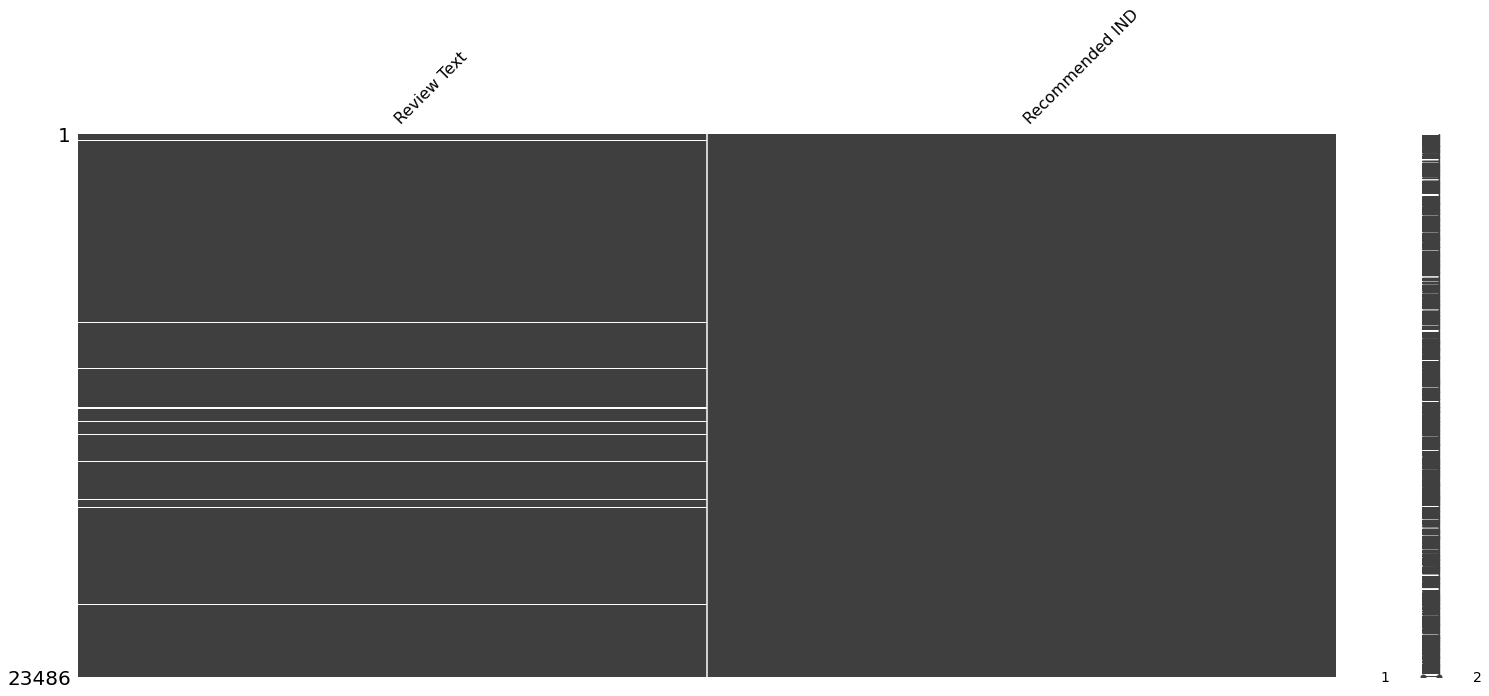

In [59]:
import missingno
missingno.matrix(df)

In [60]:
df.isnull().sum()

Review Text        845
Recommended IND      0
dtype: int64

In [61]:
df=df.dropna()

In [62]:
df.isnull().any()

Review Text        False
Recommended IND    False
dtype: bool

<AxesSubplot:xlabel='Recommended IND', ylabel='count'>

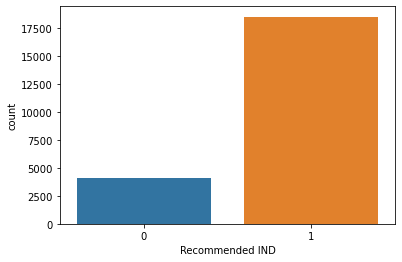

In [63]:
sns.countplot(df["Recommended IND"])

---
---


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [64]:
df.rename(columns={"Review Text":"sentences", "Recommended IND":"labels"}, inplace=True) 
df.columns

Index(['sentences', 'labels'], dtype='object')

In [65]:
rare_words = pd.Series(' '.join(df['sentences']).split()).value_counts()[-1000:]
df['sentences'] = df['sentences'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).




### Tokenization

In [66]:
def cleaning(data):
    #1.tokenize
    text_tokens =word_tokenize(data.lower())
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    #3. Removing stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    #4. Lemma 
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
     # joining
    return ' '.join(text_cleaned)

In [67]:
stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

In [68]:
df.sentences=df.sentences.apply(cleaning)

In [69]:
df.head()

sentences  labels
0        absolutely wonderful silky sexy comfortable       1
1  love dress sooo pretty happened find store gla...       1
2  high hope dress really wanted work initially o...       0
3  love love love jumpsuit fun flirty fabulous ev...       1
4  shirt flattering due adjustable front tie perf...       1

---
---


## 4. WordCloud - Repetition of Words

Now we'll create a Word Clouds for reviews, representing most common words in each target class.

### Detect Reviews (positive and negative separately)

In [76]:
positive=df[df.labels==1]["sentences"]

### Collect Words (positive and negative separately)

In [77]:
negative=df[df.labels==0]["sentences"]

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

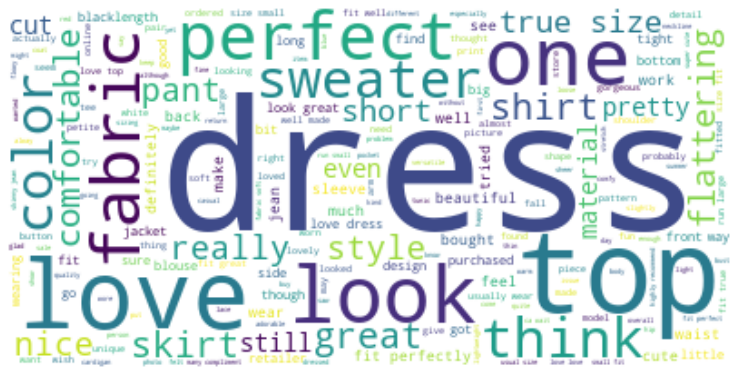

In [80]:
from wordcloud import WordCloud
cloud_positive = WordCloud(background_color="white", max_words=500).generate(" ".join(positive))
plt.figure(figsize=(13,13))
plt.imshow(cloud_positive, interpolation='bilinear')  
plt.axis('off')
plt.show()

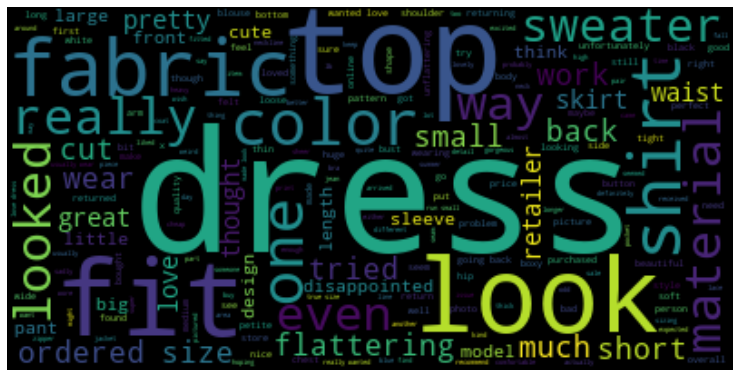

In [81]:
cloud_negative = WordCloud(background_color="black", max_words=200).generate(" ".join(negative))
plt.figure(figsize=(13,13))
plt.imshow(cloud_negative, interpolation='bilinear')  
plt.axis('off')
plt.show()

## 5. Sentiment Classification with Machine Learning

Before moving on to modeling, as data preprocessing steps we will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. 

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, we need a way to convert each document into a numeric vector. This process is known as text vectorization. 

We will train all models using TFIDF vectorizer data.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test=train_test_split(df.sentences, df.labels, test_size=0.3, random_state=42)

In the next step we create a numerical feature vector for each document:

### Vectorization

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

### TF-IDF

In [26]:
vectorizer2=TfidfVectorizer()
X_train_t=vectorizer2.fit_transform(X_train)
X_test_t=vectorizer2.transform(X_test)

In [27]:
# Import libraries
from pandas import set_option
# from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

**Creating base models to select best of it**

In [28]:

# Initial Algorithms to fit the data on
def GetBasedModel():
    basedModels = []
    basedModels.append(('LogReg'   , LogisticRegression()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('DecisionTree' , DecisionTreeClassifier()))
    basedModels.append(('AdaBoost'   , AdaBoostClassifier()))
    basedModels.append(('GBC'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ExtraTreesClassifier'   , ExtraTreesClassifier()))

    
    return basedModels

In [29]:
def BasedLine2(X_train, y_train, models):
    # Test options and evaluation metric
    num_folds = 3
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [30]:

class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [31]:
models = GetBasedModel()
names,results = BasedLine2(X_train_t, y_train,models)

LogReg: 0.880048 (0.001034)
KNN: 0.844964 (0.003455)
DecisionTree: 0.810828 (0.000742)
AdaBoost: 0.858279 (0.001303)
GBC: 0.858468 (0.001188)
RF: 0.849445 (0.000401)
ExtraTreesClassifier: 0.849192 (0.002182)


**Plotting the base models results**

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

PlotBoxR().PlotResult(names,results)

In [48]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Accuracy Score': scores})
    return scoreDataFrame

In [49]:
basedLineScore = ScoreDataFrame(names,results).sort_values(by="Accuracy Score", ascending=False)
basedLineScore

Model  Accuracy Score
0                LogReg          0.8800
4                   GBC          0.8585
3              AdaBoost          0.8583
5                    RF          0.8494
6  ExtraTreesClassifier          0.8492
1                   KNN          0.8450
2          DecisionTree          0.8108

### Logistic Regression



In [55]:
def model_check(models, X_train, y_train):
    for name, model in models.items():
        score = cross_val_score(model, X_train, y_train, cv=3, scoring='f1', n_jobs=-1)
        print(f'{name} F1 score : {np.mean(score)}')
        
models = {'random_forest':RandomForestClassifier(), 
          'logistic_reg':LogisticRegression(),
          'Ada':AdaBoostClassifier(),
           'SVM': SVC()}

model_check(models, X_train_t, y_train)

random_forest F1 score : 0.9145994187080179
logistic_reg F1 score : 0.9301294203505712
Ada F1 score : 0.9164740882093726
SVM F1 score : 0.9309714199754922


In [36]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
logreg=LogisticRegression(C=5, solver='liblinear').fit(X_train_t, y_train)
y_predt=logreg.predict(X_test_t)
print(classification_report(y_test, y_predt))
accuracy_logreg= accuracy_score(y_test, y_predt)
f1_logreg=f1_score(y_test, y_predt)

              precision    recall  f1-score   support

           0       0.76      0.57      0.65      1247
           1       0.91      0.96      0.93      5546

    accuracy                           0.89      6793
   macro avg       0.84      0.77      0.79      6793
weighted avg       0.88      0.89      0.88      6793



In [37]:
print(accuracy_logreg)
print(f1_logreg)

0.8888561754747534
0.9337777387948425


### Support Vector Machine (SVM)

In [38]:
svm=SVC().fit(X_train_t, y_train)
y_preds=svm.predict(X_test_t)
print(classification_report(y_test, y_preds))
accuracy_svm=accuracy_score(y_test, y_preds)

f1score_svm=f1_score(y_test, y_preds)


              precision    recall  f1-score   support

           0       0.80      0.51      0.63      1247
           1       0.90      0.97      0.93      5546

    accuracy                           0.89      6793
   macro avg       0.85      0.74      0.78      6793
weighted avg       0.88      0.89      0.88      6793



In [39]:
print(accuracy_svm)
print(f1score_svm)

0.8870896511114382
0.9335297686107982


### Random Forest

In [40]:
rf_t=RandomForestClassifier().fit(X_train_t, y_train)
y_predrf_t=rf_t.predict(X_test_t)
print(classification_report(y_test, y_predrf_t))
accuracyrf=accuracy_score(y_test, y_predrf_t)

f1score_rf=f1_score(y_test, y_preds)


              precision    recall  f1-score   support

           0       0.88      0.22      0.35      1247
           1       0.85      0.99      0.92      5546

    accuracy                           0.85      6793
   macro avg       0.86      0.60      0.63      6793
weighted avg       0.85      0.85      0.81      6793



In [41]:
print(accuracyrf)

print(f1score_rf)

0.8504342705726483
0.9335297686107982


### Ada  Boosting

In [42]:
ada=AdaBoostClassifier().fit(X_train_t, y_train)
y_preda=ada.predict(X_test_t)
print(classification_report(y_test, y_preda))
accuracy_ad=accuracy_score(y_test, y_preda)

f1score_ad=f1_score(y_test, y_preda)


              precision    recall  f1-score   support

           0       0.68      0.45      0.54      1247
           1       0.89      0.95      0.92      5546

    accuracy                           0.86      6793
   macro avg       0.78      0.70      0.73      6793
weighted avg       0.85      0.86      0.85      6793



In [43]:
print(accuracy_ad)
print(f1score_ad)

0.8602973649344914
0.9175141242937852


In [44]:
nb=GaussianNB().fit(X_train_t.toarray(), y_train)
y_predn=nb.predict(X_test_t.toarray())
print(classification_report(y_test, y_predn))
accuracy_nb=accuracy_score(y_test, y_predn)
f1score_nb=f1_score(y_test, y_preda)

              precision    recall  f1-score   support

           0       0.20      0.71      0.31      1247
           1       0.85      0.36      0.51      5546

    accuracy                           0.43      6793
   macro avg       0.52      0.54      0.41      6793
weighted avg       0.73      0.43      0.47      6793



In [45]:
print(accuracy_nb)
print(f1score_nb)

0.42691005446783453
0.9175141242937852


### Compare Models Accuracies and F1 Scores

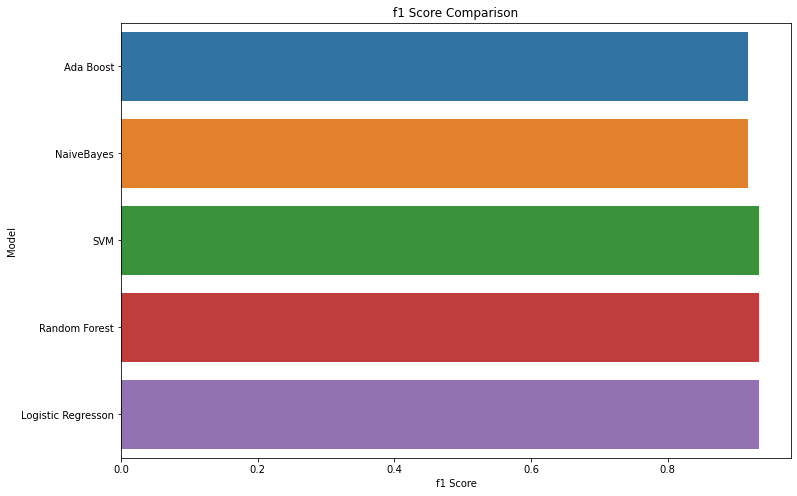

In [46]:
compare = pd.DataFrame({"Model": ["Logistic Regresson", "SVM", "Random Forest", "Ada Boost","NaiveBayes"],
                        "f1 Score": [f1_logreg, f1score_svm, f1score_rf,f1score_ad, f1score_nb]})

compare = compare.sort_values(by="f1 Score", ascending=True)

plt.figure(figsize=(12,8))
ax = sns.barplot(x="f1 Score", y="Model", data=compare)
ax.set_title("f1 Score Comparison");

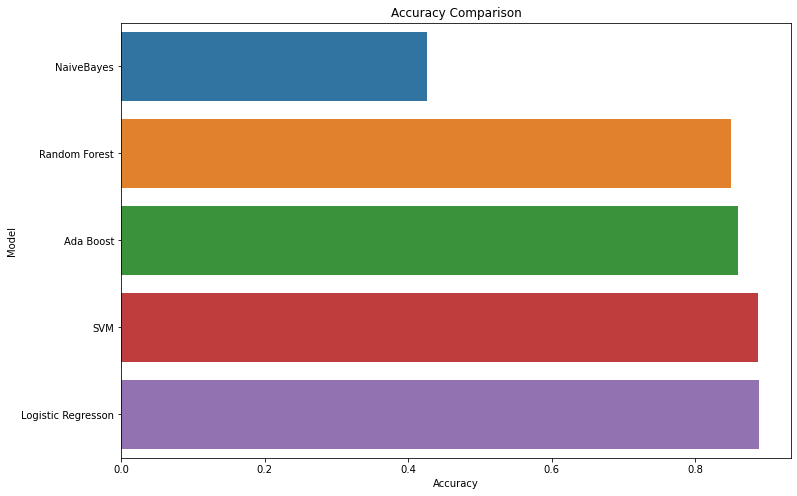

In [47]:
compare = pd.DataFrame({"Model": ["Logistic Regresson", "SVM", "Random Forest", "Ada Boost","NaiveBayes"],
                        "Accuracy": [accuracy_logreg, accuracy_svm, accuracyrf,accuracy_ad, accuracy_nb]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(12,8))
ax = sns.barplot(x="Accuracy", y="Model", data=compare)
ax.set_title("Accuracy Comparison");

### Conclusion

This project was aimed to used sentiment analysis to determined product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used Tf-Idf model to convert the text into numerical feature vectors. Finally we started training 5 different Classification models and we got the best accuracy of 0.93 for Logistic Regression method. 